# Seaborn
## Distribution Plots

In [1]:
import seaborn as sns
%matplotlib inline

In [3]:
#Seaborn comes with built-in data sets!
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### displot
The distplot shows the distribution of a univariate set of observations.

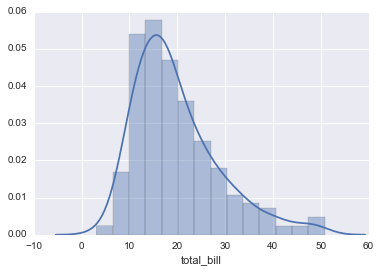

In [4]:
sns.distplot(tips['total_bill'])

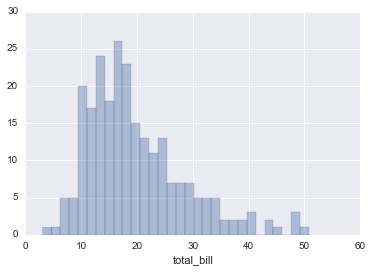

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### Jointplot

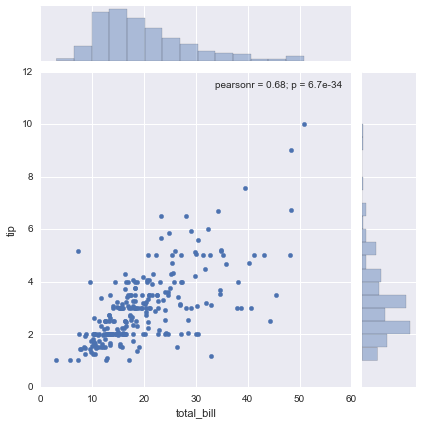

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

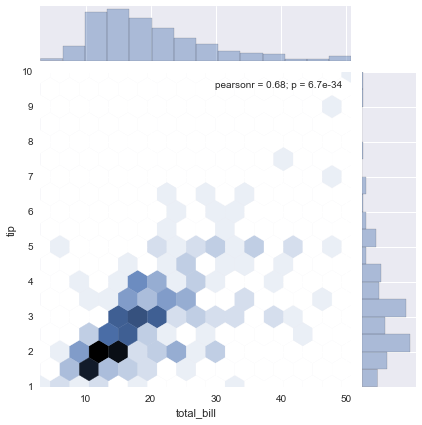

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

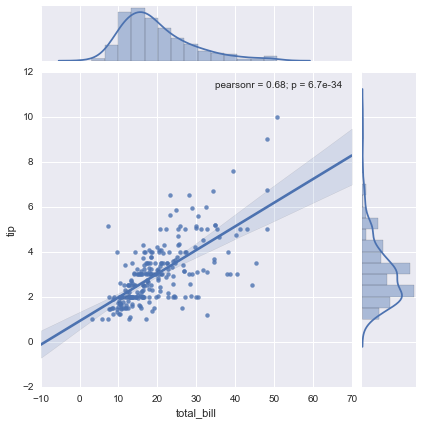

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### pairplot

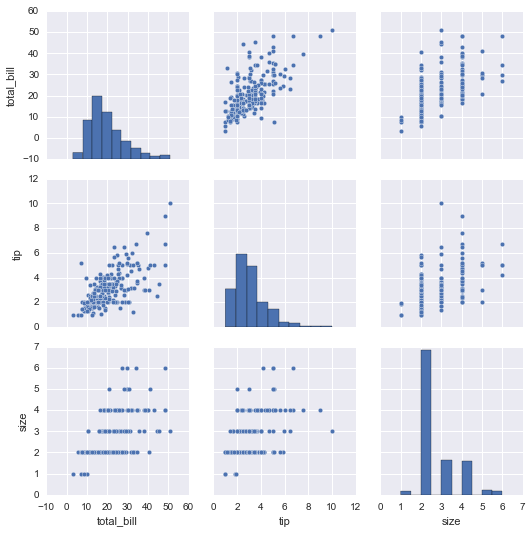

In [15]:
sns.pairplot(tips)

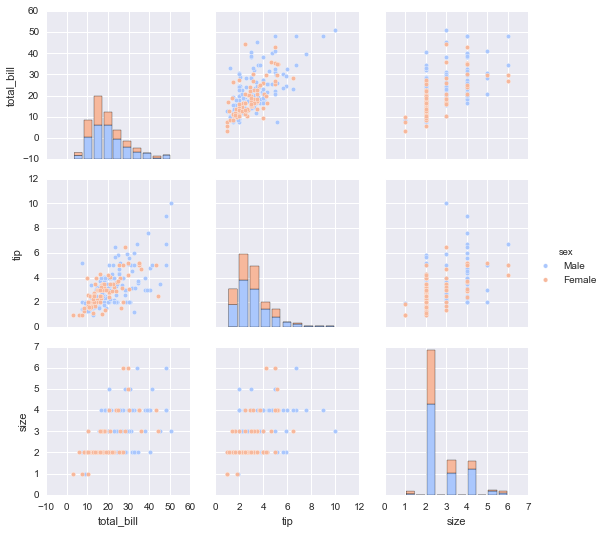

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### rugplot
rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

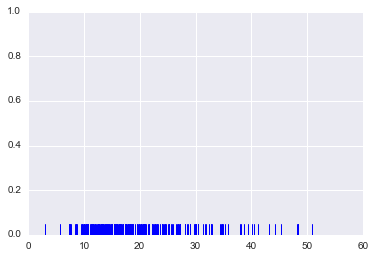

In [17]:
sns.rugplot(tips['total_bill'])

### kdeplot
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

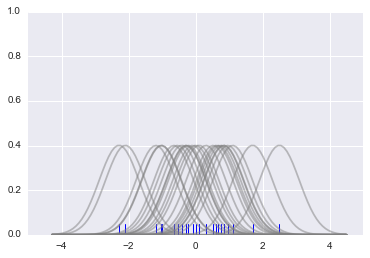

In [18]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

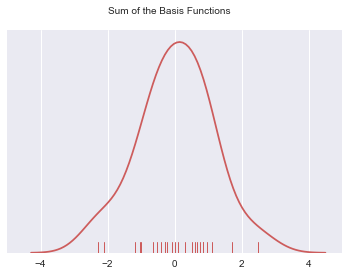

In [19]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

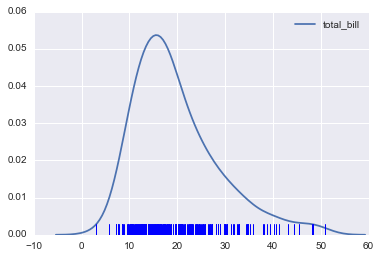

In [20]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

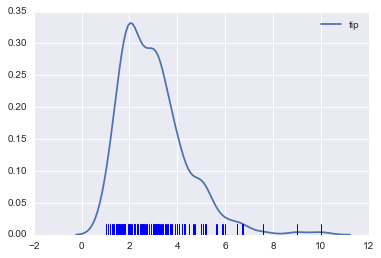

In [21]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Distribution Plots

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

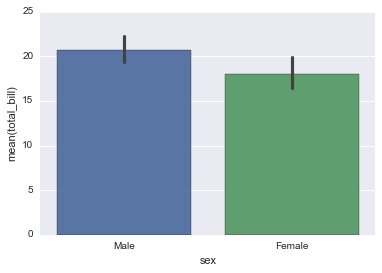

In [22]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [23]:
import numpy as np

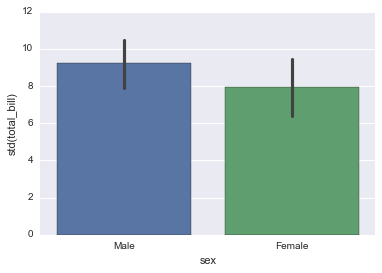

In [24]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

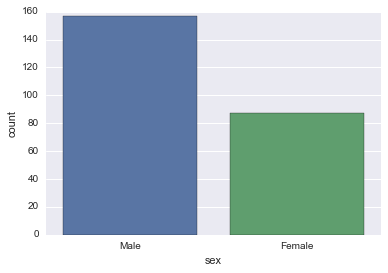

In [25]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

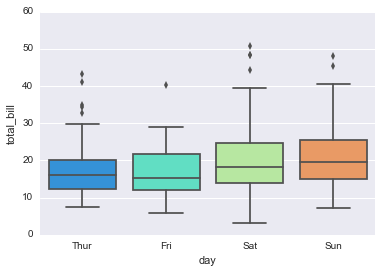

In [26]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

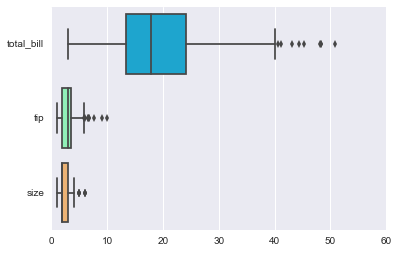

In [27]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

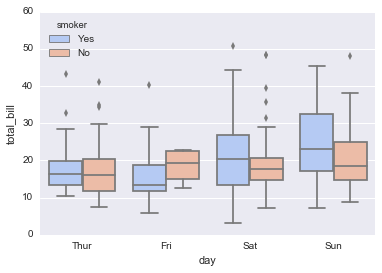

In [28]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

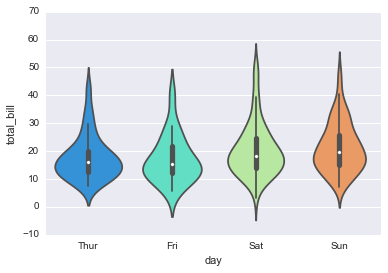

In [29]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

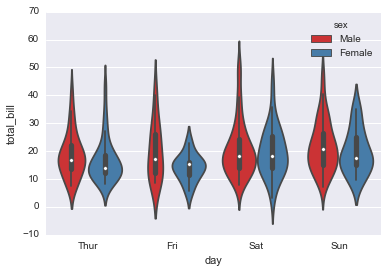

In [30]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

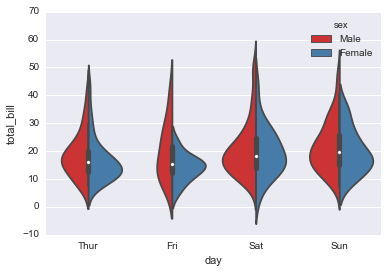

In [31]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

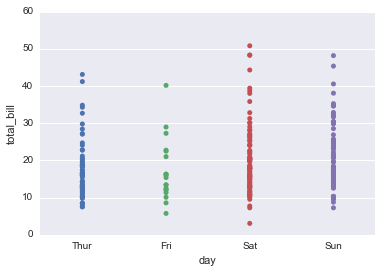

In [32]:
sns.stripplot(x="day", y="total_bill", data=tips)

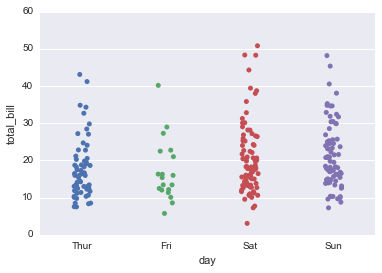

In [33]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

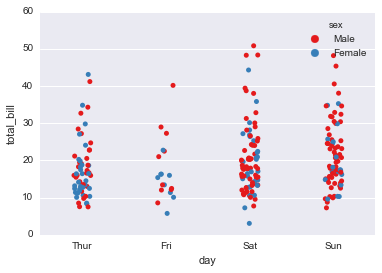

In [34]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

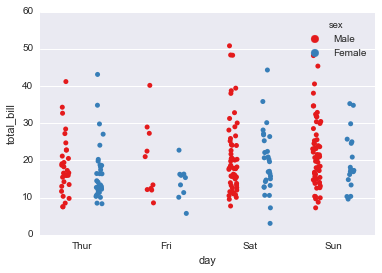

In [35]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

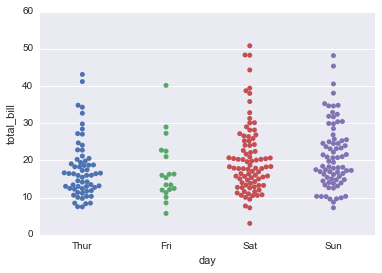

In [36]:
sns.swarmplot(x="day", y="total_bill", data=tips)

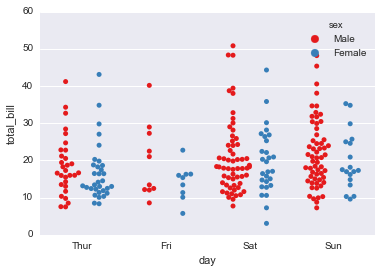

In [37]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots

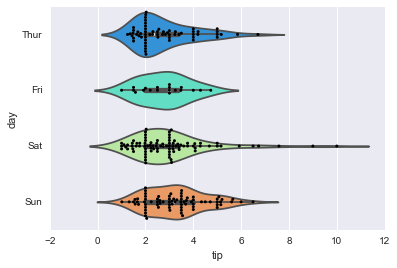

In [38]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### factor plot

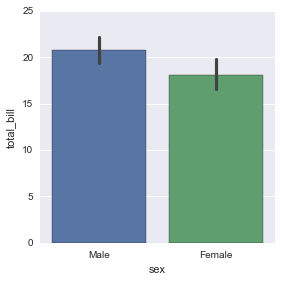

In [39]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [40]:
flights = sns.load_dataset('flights')

In [41]:
tips = sns.load_dataset('tips')

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Heatmap

In [44]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


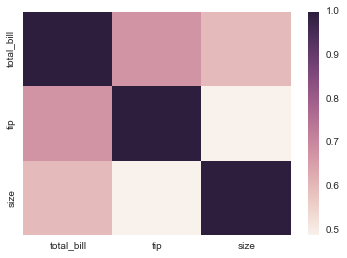

In [45]:
sns.heatmap(tips.corr())

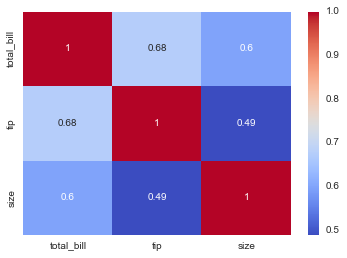

In [46]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [47]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


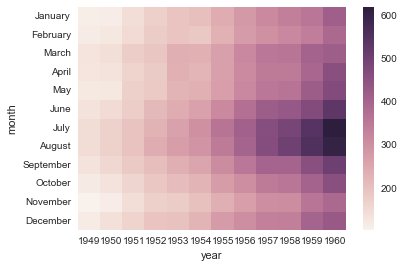

In [48]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

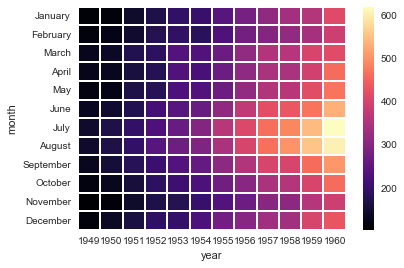

In [49]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

### clustermap

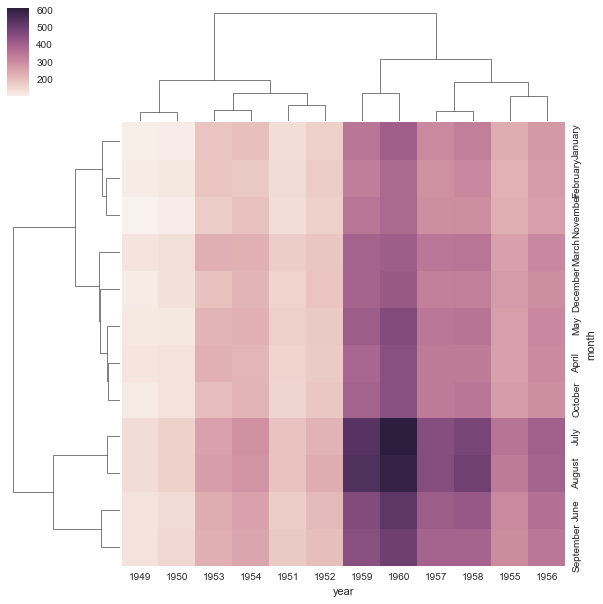

In [50]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

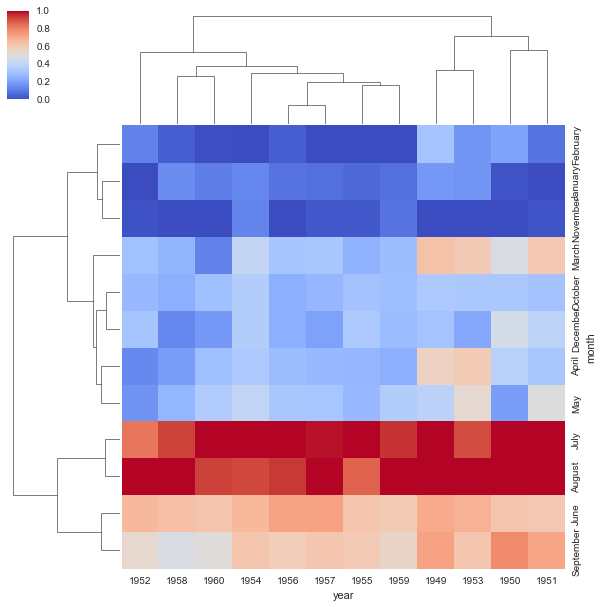

In [51]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

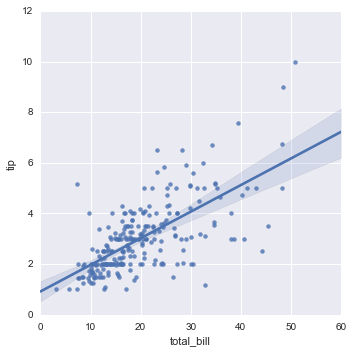

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips)

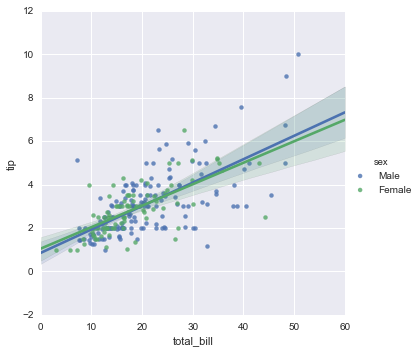

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

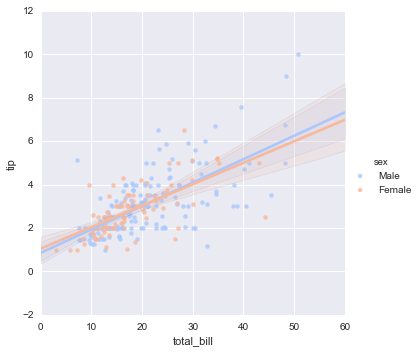

In [55]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

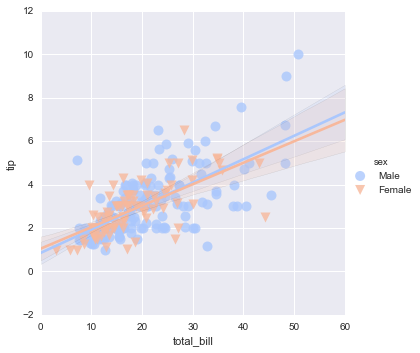

In [56]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

### Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

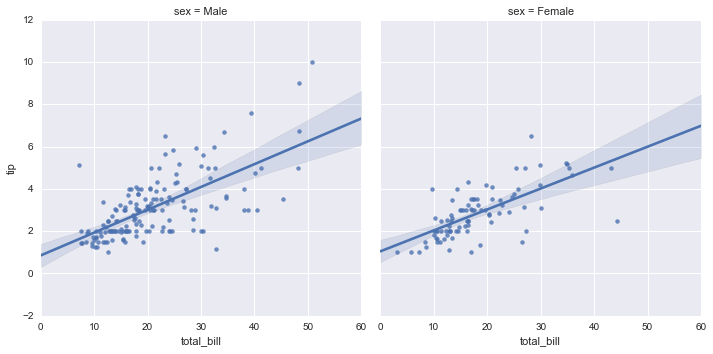

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

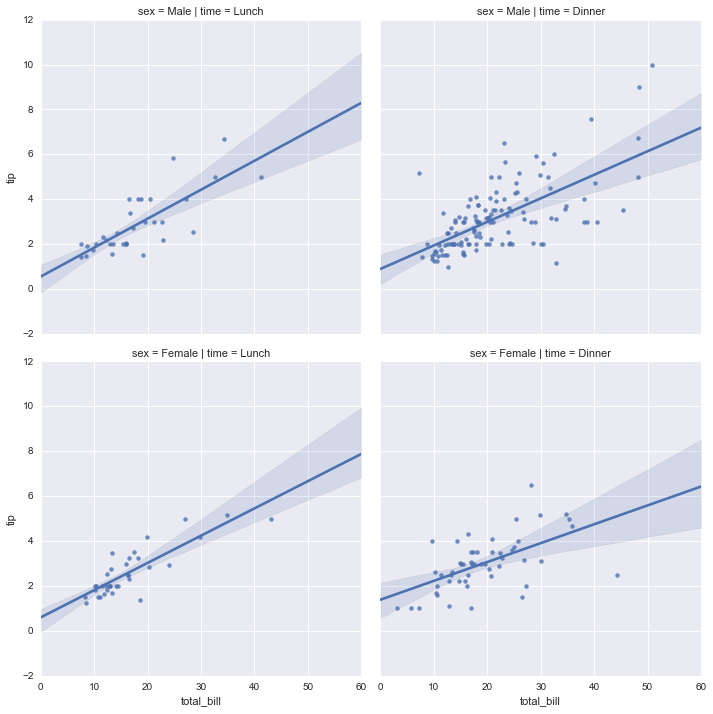

In [58]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

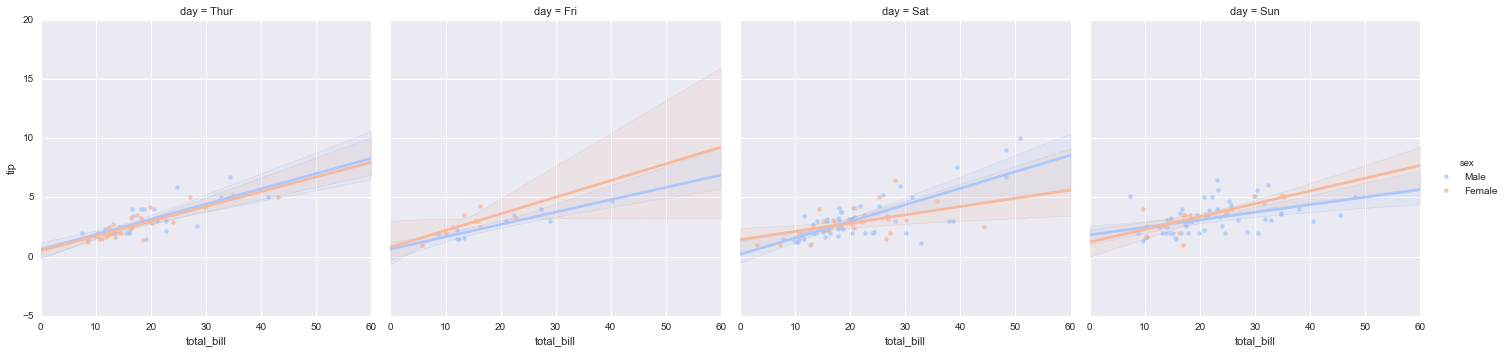

In [59]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and Size
Seaborn figures can have their size and aspect ratio adjusted with the size and aspect parameters:

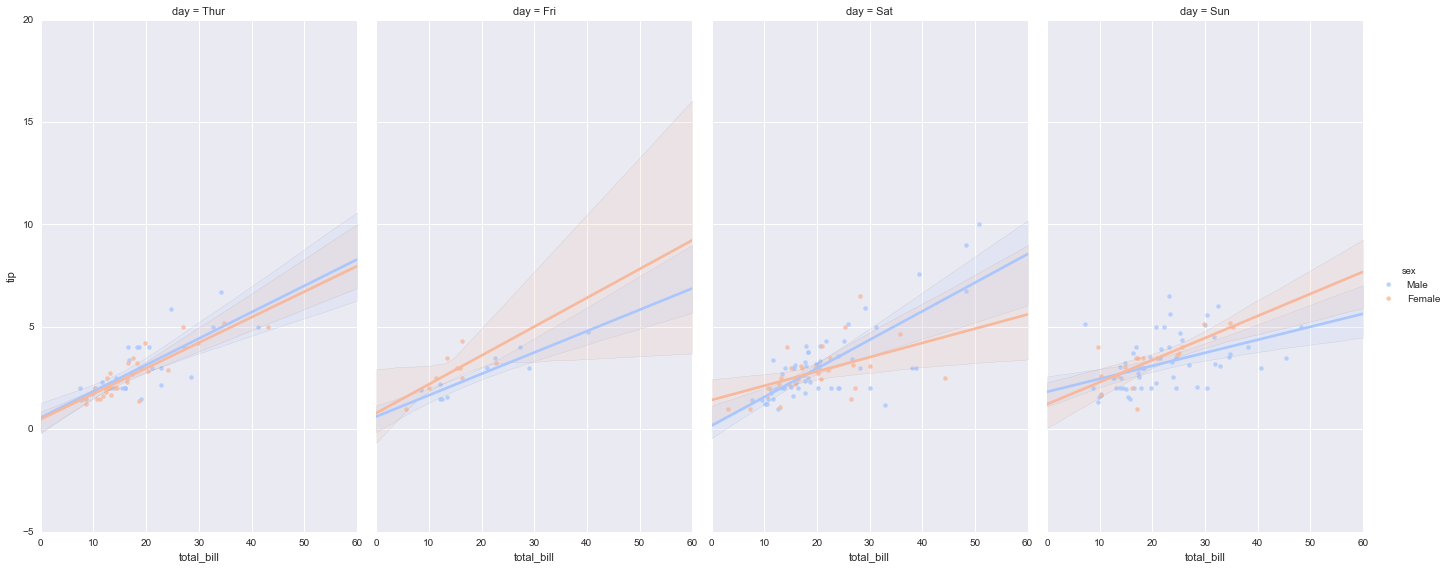

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

## Grids
Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
iris = sns.load_dataset('iris')

In [63]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


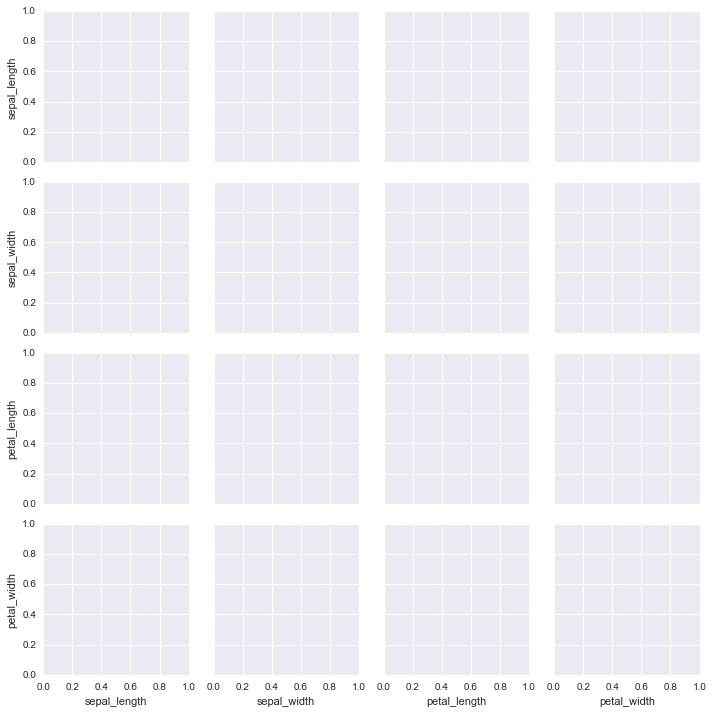

In [64]:
# Just the Grid
sns.PairGrid(iris)

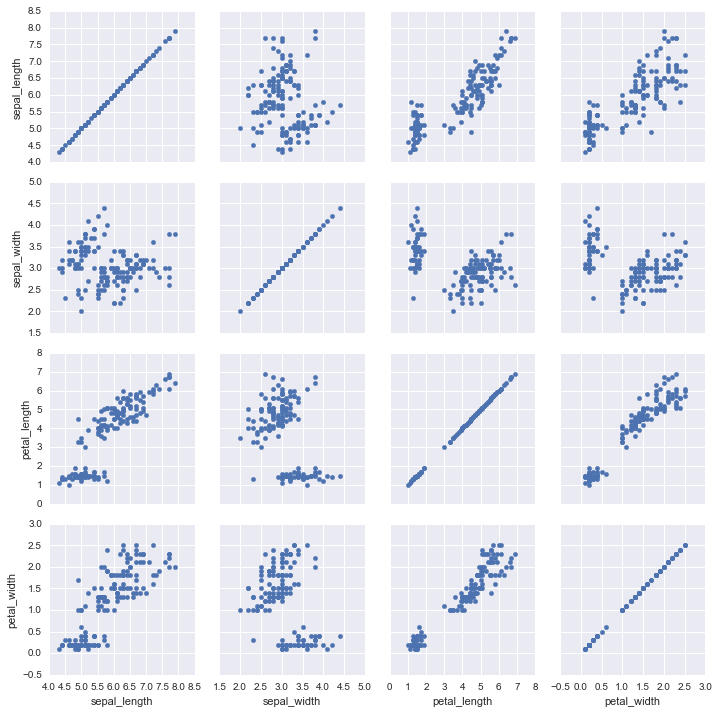

In [65]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

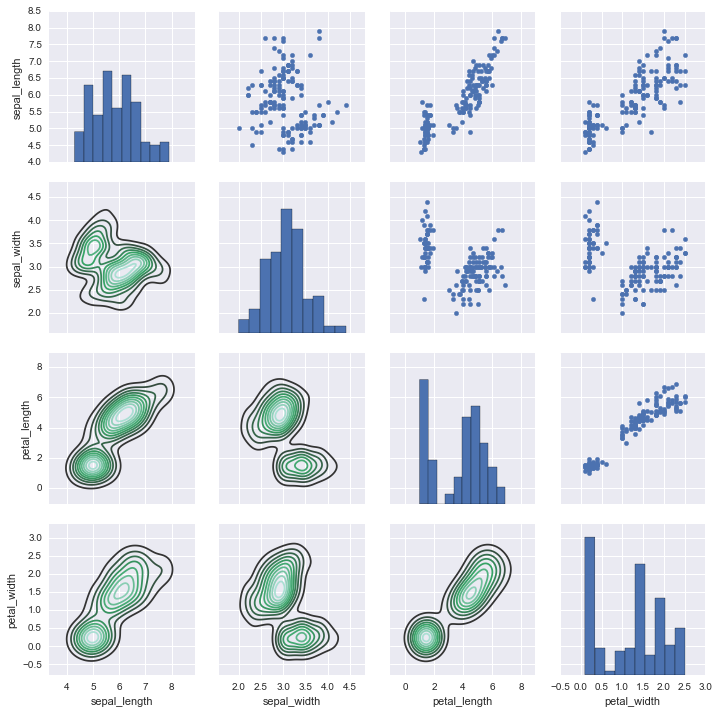

In [66]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot
pairplot is a simpler version of PairGrid (you'll use quite often)

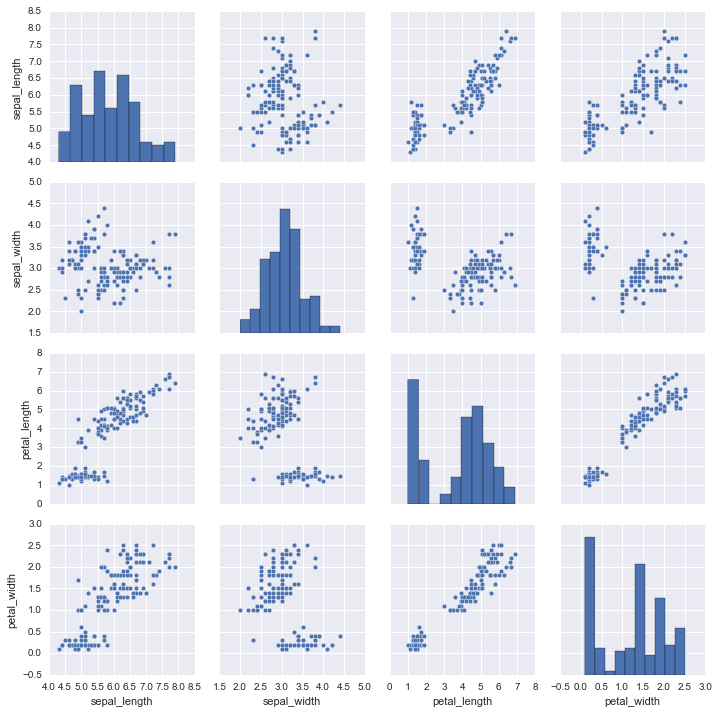

In [67]:
sns.pairplot(iris)

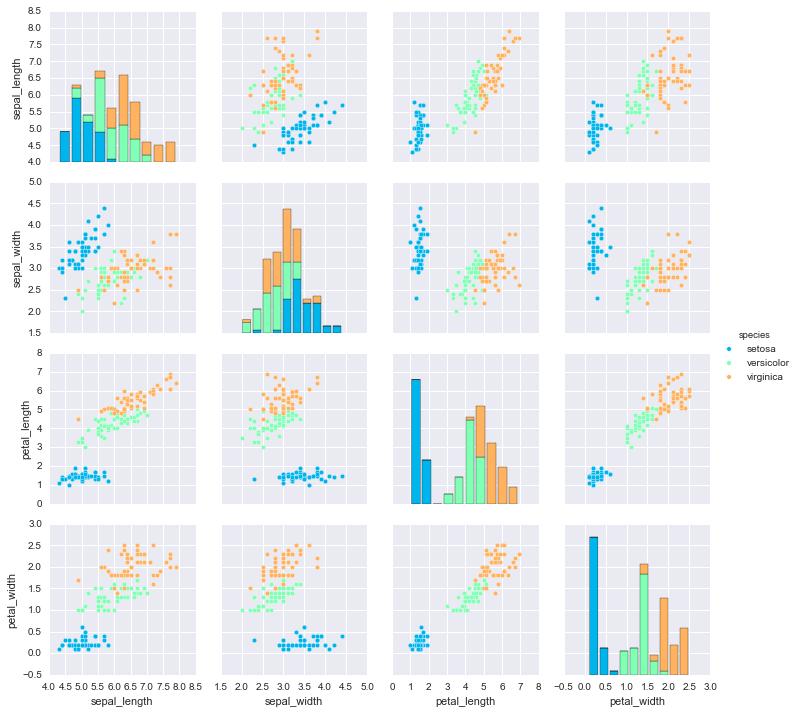

In [68]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [69]:
tips = sns.load_dataset('tips')

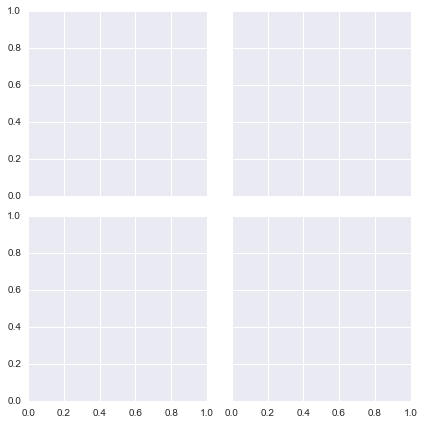

In [70]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

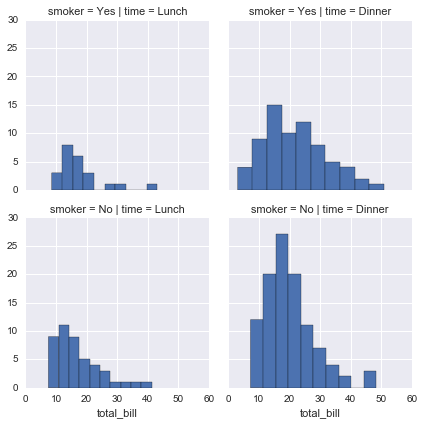

In [71]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

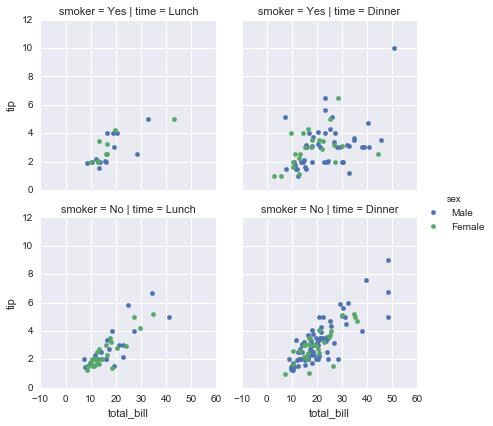

In [72]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

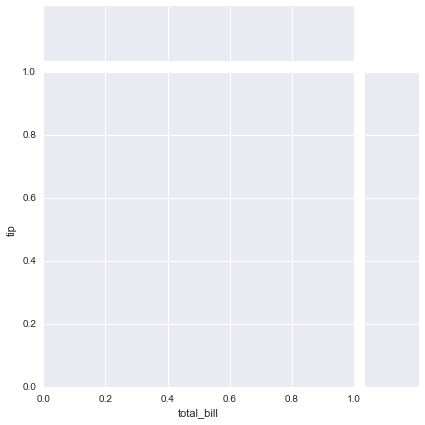

In [73]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

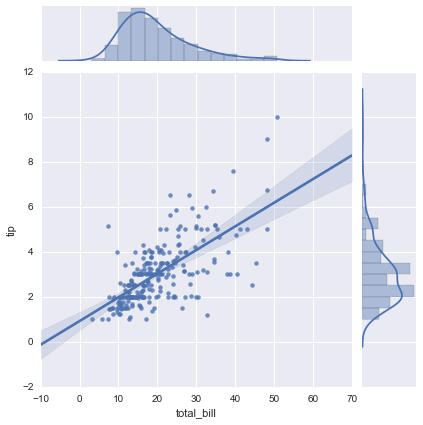

In [74]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

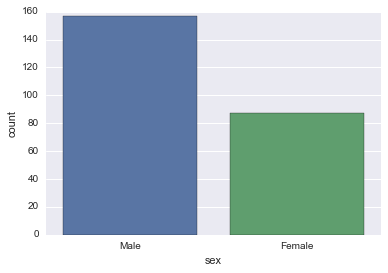

In [77]:
sns.countplot(x='sex',data=tips)

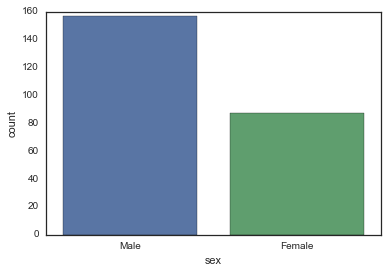

In [78]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

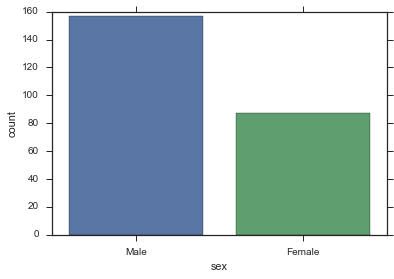

In [79]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

### Spine Removal

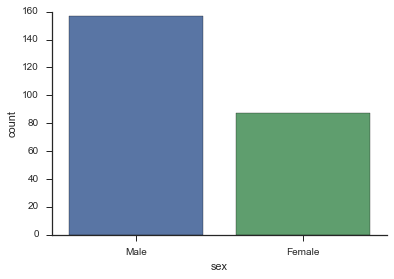

In [81]:
sns.countplot(x='sex',data=tips)
sns.despine()

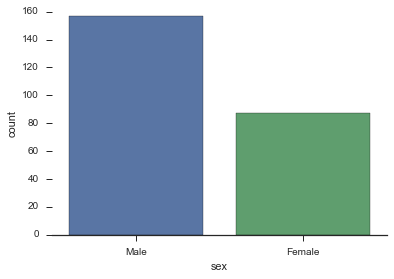

In [80]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:


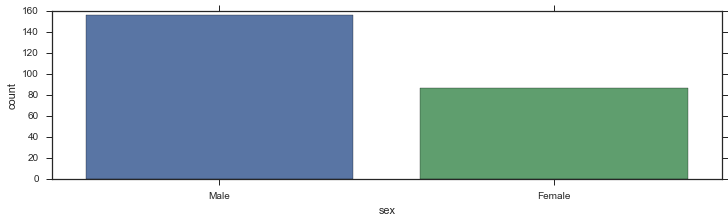

In [82]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

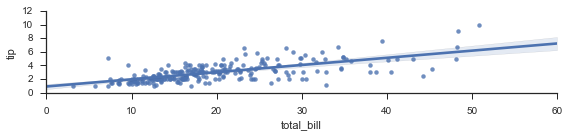

In [83]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

### Scale and Context

The set_context() allows you to override default parameters:

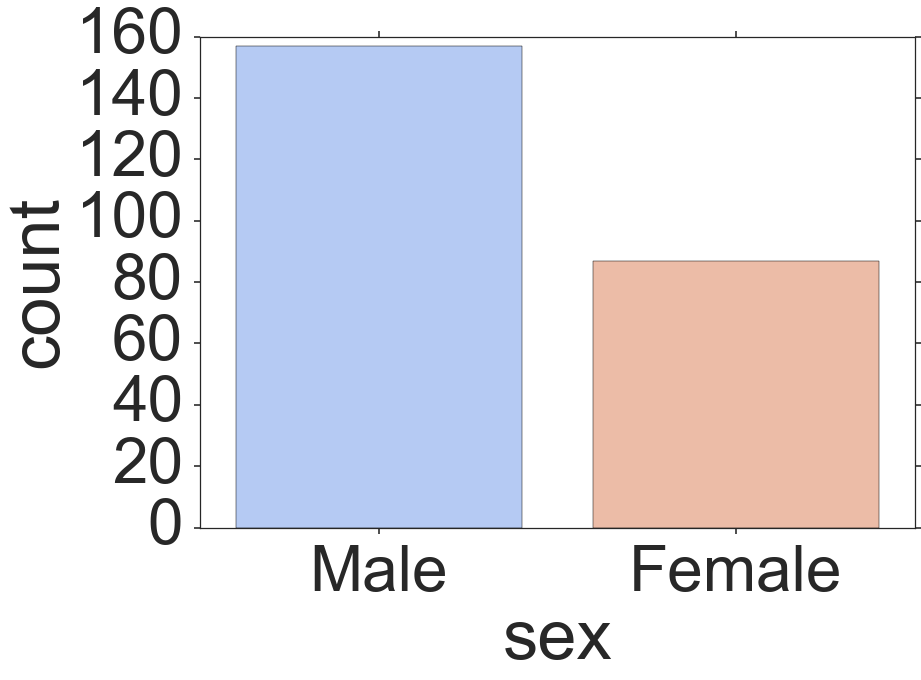

In [84]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

In [99]:
sns.puppyplot()

# Exercises

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
sns.set_style('whitegrid')

In [89]:
titanic = sns.load_dataset('titanic')

In [90]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
sns.set_context(context='notebook', font_scale=1, rc=None)

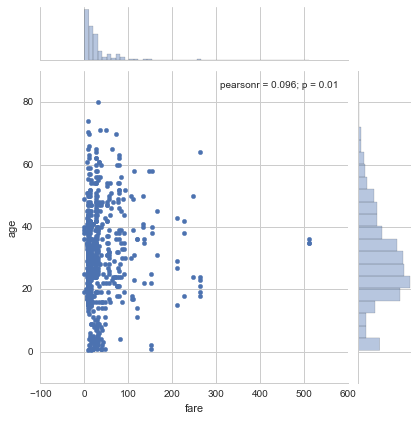

In [98]:
sns.jointplot(x='fare',y='age',data=titanic)

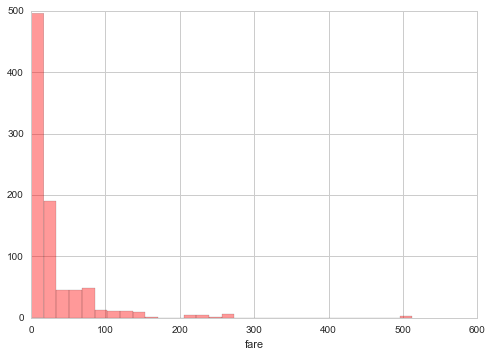

In [100]:
sns.distplot(titanic['fare'],bins=30,kde=False,color='red')

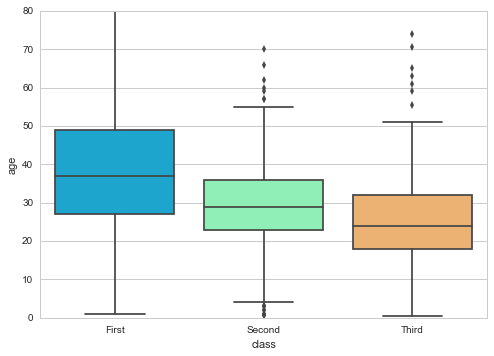

In [101]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

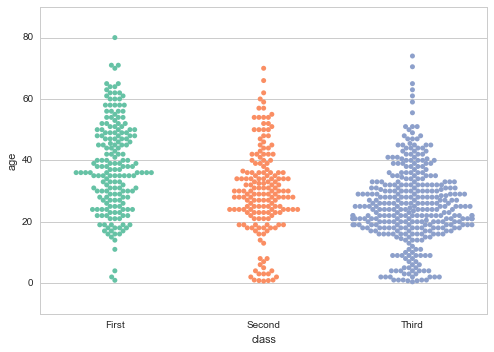

In [102]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

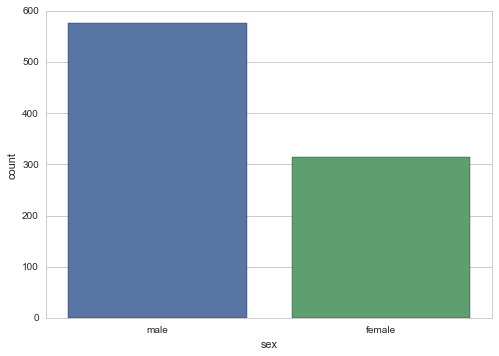

In [103]:
sns.countplot(x='sex',data=titanic)

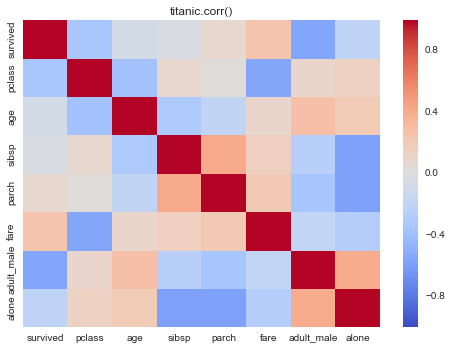

In [104]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

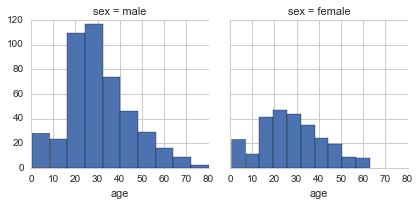

In [105]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')